# **Spam Email Detection**
---
                                                                 Name : VISHNU E
                                                                 Organization : CognoRise InfoTech
                                                                 Date : 19/09/2024

## **Problem Statement**
---

Create a model to classify emails as spam or not spam based on their
content.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

### Importing Dataset

In [3]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Exploratory Data Analysis

In [5]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# checking for null values

df.isnull().sum()

,0
Category,0
Message,0


<Axes: xlabel='count', ylabel='Category'>

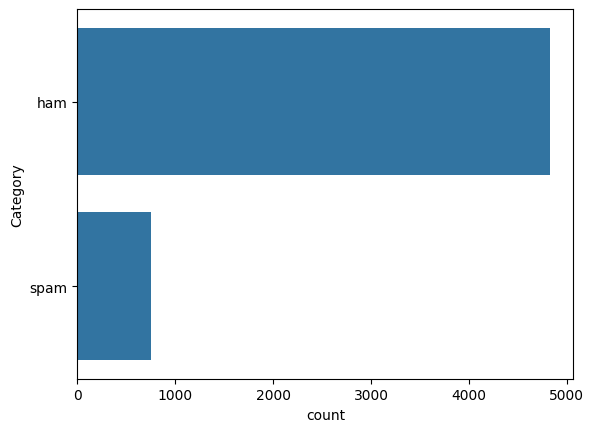

In [7]:
# target variable distribution

sns.countplot(df['Category'])

In [8]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [9]:
# changing spam->1 and ham->0

df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Stop words removal, Lemmatization and Tokenization

In [10]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Stop words removal
stop_words = set(stopwords.words('english'))

# Lemmatization
lemmatizer = WordNetLemmatizer()

# Tokenization
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]  # Stop words removal and stemming
    return ' '.join(filtered_tokens)

df['Message'] = df['Message'].apply(preprocess_text)

In [12]:
# Removing special characters

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return ' '.join(text.split())

df['Message'] = df['Message'].apply(preprocess_text)
df['Message']

,Message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah nt think go usf life around though
...,...
5567,nd time tried contact u u pound prize claim ea...
5568,b going esplanade fr home
5569,pity mood suggestion
5570,guy bitching acted like d interested buying so...


### Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
df_new = vectorization.fit_transform(df['Message'])
df_new

<5572x7561 sparse matrix of type '<class 'numpy.float64'>'
	with 45465 stored elements in Compressed Sparse Row format>

In [14]:
df_new.shape

(5572, 7561)

### Dateset Splitting, Model Building and Evaluation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

X = df_new
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Test Accuracy': accuracy_score(y_test, lr_pred),
    'Train Accuracy': accuracy_score(y_train, lr_model.predict(X_train)),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred),
    'F1 score': f1_score(y_test, lr_pred),
    'Train confusion matrix': confusion_matrix(y_train, lr_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, lr_pred)

}
results.append(lr_metrics)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Test Accuracy': accuracy_score(y_test, rf_pred),
    'Train Accuracy': accuracy_score(y_train, rf_model.predict(X_train)),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 score': f1_score(y_test, rf_pred),
    'Train confusion matrix': confusion_matrix(y_train, rf_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, rf_pred)

}
results.append(rf_metrics)

# Ada Boost
ad_model = AdaBoostClassifier()
ad_model.fit(X_train, y_train)
ad_pred = ad_model.predict(X_test)
ad_metrics = {
    'Model': 'Ada boost classifier',
    'Test Accuracy': accuracy_score(y_test, ad_pred),
    'Train Accuracy': accuracy_score(y_train, ad_model.predict(X_train)),
    'Precision': precision_score(y_test, ad_pred),
    'Recall': recall_score(y_test, ad_pred),
    'F1 score': f1_score(y_test, ad_pred),
    'Train confusion matrix': confusion_matrix(y_train, ad_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, ad_pred)
}
results.append(ad_metrics)

#  KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_metrics = {
    'Model': 'KNN Classifier',
    'Test Accuracy': accuracy_score(y_test, knn_pred),
    'Train Accuracy': accuracy_score(y_train, knn_model.predict(X_train)),
    'Precision': precision_score(y_test, knn_pred),
    'Recall': recall_score(y_test, knn_pred),
    'F1 score': f1_score(y_test, knn_pred),
    'Train confusion matrix': confusion_matrix(y_train, knn_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, knn_pred)
}
results.append(knn_metrics)


# Create DataFrame for results
results_df = pd.DataFrame(results)
results_df

,Model,Test Accuracy,Train Accuracy,Precision,Recall,F1 score,Train confusion matrix,Test confusion matrix
0,Logistic Regression,0.957848,0.966569,0.990385,0.691275,0.814229,"[[3852, 7], [142, 456]]","[[965, 1], [46, 103]]"
1,Random Forest,0.978475,1.000000,1.000000,0.838926,0.912409,"[[3859, 0], [0, 598]]","[[966, 0], [24, 125]]"
2,Ada boost classifier,0.969507,0.972627,0.913669,0.852349,0.881944,"[[3831, 28], [94, 504]]","[[954, 12], [22, 127]]"
3,KNN Classifier,0.920179,0.923042,1.000000,0.402685,0.574163,"[[3859, 0], [343, 255]]","[[966, 0], [89, 60]]"
